In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
save_site = 'all_locations'

all_sites_call_signals = np.array([],dtype='object')
all_sites_call_info = pd.DataFrame()
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    choice_type = 'top1_inbouts'
    filter_settings = '6ms_nobandpass'
    signals = 'call_signals'
    filepath = input_dir / f'2022_bd2{site_key}_{choice_type}_{filter_settings}_{signals}.npy'
    if (filepath).exists():
        print(site_key)
        location_call_signals = np.load(filepath, allow_pickle=True)
        print(location_call_signals.shape)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_bd2{site_key}_{choice_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        all_sites_call_info = pd.concat([all_sites_call_info, location_calls_sampled])
        all_sites_call_signals=np.concatenate([all_sites_call_signals, location_call_signals])
        print(all_sites_call_signals.shape)


Central
(25731,)
(25731,)
Foliage
(55417,)
(81148,)
Carp
(38693,)
(119841,)
Telephone
(46565,)
(166406,)


In [5]:
all_sites_call_info = all_sites_call_info.reset_index(drop=True)
all_sites_call_info['index'] = all_sites_call_info.index
all_sites_call_info

index  start_time_wrt_ref  end_time_wrt_ref  index_in_file  \
0            0           1538.6595         1538.6702             57   
1            1           1557.1585         1557.1760             64   
2            2           1571.2785         1571.2978            110   
3            3           1703.0335         1703.0453            204   
4            4           1703.7215         1703.7359            206   
...        ...                 ...               ...            ...   
166401  166401            945.6925          945.6987         991011   
166402  166402            966.2425          966.2483         991025   
166403  166403            978.5655          978.5707         991034   
166404  166404            729.4345          729.4387         990897   
166405  166405           1200.4145         1200.4285         991039   

       freq_group  index_in_file.1             ref_time  \
0             LF1               53  2022-07-26 04:30:00   
1             LF1               60  2022-07-26 04:30:00   
2             LF1              106  2022-07-26 04:30:00   
3             LF1              200  2022-07-26 04:30:00   
4             LF1              202  2022-07-26 04:30:00   
...           ...              ...                  ...   
166401        HF2              608  2022-10-17 13:30:00   
166402        HF2              622  2022-10-17 13:30:00   
166403        HF2              631  2022-10-17 13:30:00   
166404        HF1              494  2022-10-17 13:30:00   
166405        LF1              636  2022-10-17 13:30:00   

                   call_start_time               call_end_time  start_time  \
0       2022-07-26 04:55:38.659500  2022-07-26 04:55:38.670200   1538.6595   
1       2022-07-26 04:55:57.158500  2022-07-26 04:55:57.176000   1557.1585   
2       2022-07-26 04:56:11.278500  2022-07-26 04:56:11.297800   1571.2785   
3       2022-07-26 04:58:23.033500  2022-07-26 04:58:23.045300   1703.0335   
4       2022-07-26 04:58:23.721500  2022-07-26 04:58:23.735900   1703.7215   
...                            ...                         ...         ...   
166401  2022-10-17 13:45:45.692500  2022-10-17 13:45:45.698700    945.6925   
166402  2022-10-17 13:46:06.242500  2022-10-17 13:46:06.248300    966.2425   
166403  2022-10-17 13:46:18.565500  2022-10-17 13:46:18.570700    978.5655   
166404  2022-10-17 13:42:09.434500  2022-10-17 13:42:09.438700    729.4345   
166405  2022-10-17 13:50:00.414500  2022-10-17 13:50:00.428500   1200.4145   

        ...                                         input_file  \
0       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
1       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
2       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
3       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
4       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
...     ...                                                ...   
166401  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166402  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166403  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166404  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166405  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   

              Site name    Recover Folder   SD Card File Duration  \
0          Central Pond  recover-20220728  UBNA_008           NaN   
1          Central Pond  recover-20220728  UBNA_008           NaN   
2          Central Pond  recover-20220728  UBNA_008           NaN   
3          Central Pond  recover-20220728  UBNA_008           NaN   
4          Central Pond  recover-20220728  UBNA_008           NaN   
...                 ...               ...       ...           ...   
166401  Telephone Field  recover-20221017         7           NaN   
166402  Telephone Field  recover-20221017         7           NaN   
166403  Telephone Field  recover-20221017         7           NaN   
166404  Telephone Field  re

In [6]:
snr_thresh = 0
good_snr_location_calls_sampled = all_sites_call_info.loc[all_sites_call_info['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

index  start_time_wrt_ref  end_time_wrt_ref  index_in_file  \
0            0           1538.6595         1538.6702             57   
1            1           1557.1585         1557.1760             64   
2            2           1571.2785         1571.2978            110   
3            3           1703.0335         1703.0453            204   
4            4           1703.7215         1703.7359            206   
...        ...                 ...               ...            ...   
166401  166401            945.6925          945.6987         991011   
166402  166402            966.2425          966.2483         991025   
166403  166403            978.5655          978.5707         991034   
166404  166404            729.4345          729.4387         990897   
166405  166405           1200.4145         1200.4285         991039   

       freq_group  index_in_file.1             ref_time  \
0             LF1               53  2022-07-26 04:30:00   
1             LF1               60  2022-07-26 04:30:00   
2             LF1              106  2022-07-26 04:30:00   
3             LF1              200  2022-07-26 04:30:00   
4             LF1              202  2022-07-26 04:30:00   
...           ...              ...                  ...   
166401        HF2              608  2022-10-17 13:30:00   
166402        HF2              622  2022-10-17 13:30:00   
166403        HF2              631  2022-10-17 13:30:00   
166404        HF1              494  2022-10-17 13:30:00   
166405        LF1              636  2022-10-17 13:30:00   

                   call_start_time               call_end_time  start_time  \
0       2022-07-26 04:55:38.659500  2022-07-26 04:55:38.670200   1538.6595   
1       2022-07-26 04:55:57.158500  2022-07-26 04:55:57.176000   1557.1585   
2       2022-07-26 04:56:11.278500  2022-07-26 04:56:11.297800   1571.2785   
3       2022-07-26 04:58:23.033500  2022-07-26 04:58:23.045300   1703.0335   
4       2022-07-26 04:58:23.721500  2022-07-26 04:58:23.735900   1703.7215   
...                            ...                         ...         ...   
166401  2022-10-17 13:45:45.692500  2022-10-17 13:45:45.698700    945.6925   
166402  2022-10-17 13:46:06.242500  2022-10-17 13:46:06.248300    966.2425   
166403  2022-10-17 13:46:18.565500  2022-10-17 13:46:18.570700    978.5655   
166404  2022-10-17 13:42:09.434500  2022-10-17 13:42:09.438700    729.4345   
166405  2022-10-17 13:50:00.414500  2022-10-17 13:50:00.428500   1200.4145   

        ...                                         input_file  \
0       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
1       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
2       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
3       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
4       ...  /mnt/ubna_data_01_mir/recover-20220728/UBNA_00...   
...     ...                                                ...   
166401  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166402  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166403  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166404  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   
166405  ...  /mnt/ubna_data_02_mir/recover-20221017/UBNA_00...   

              Site name    Recover Folder   SD Card File Duration  \
0          Central Pond  recover-20220728  UBNA_008           NaN   
1          Central Pond  recover-20220728  UBNA_008           NaN   
2          Central Pond  recover-20220728  UBNA_008           NaN   
3          Central Pond  recover-20220728  UBNA_008           NaN   
4          Central Pond  recover-20220728  UBNA_008           NaN   
...                 ...               ...       ...           ...   
166401  Telephone Field  recover-20221017         7           NaN   
166402  Telephone Field  recover-20221017         7           NaN   
166403  Telephone Field  recover-20221017         7           NaN   
166404  Telephone Field  re

In [7]:
all_sites_call_signals.shape

(166406,)

In [8]:
n = 10
call_indices = random.sample(range(0, len(good_snr_location_calls_sampled)), n**2)

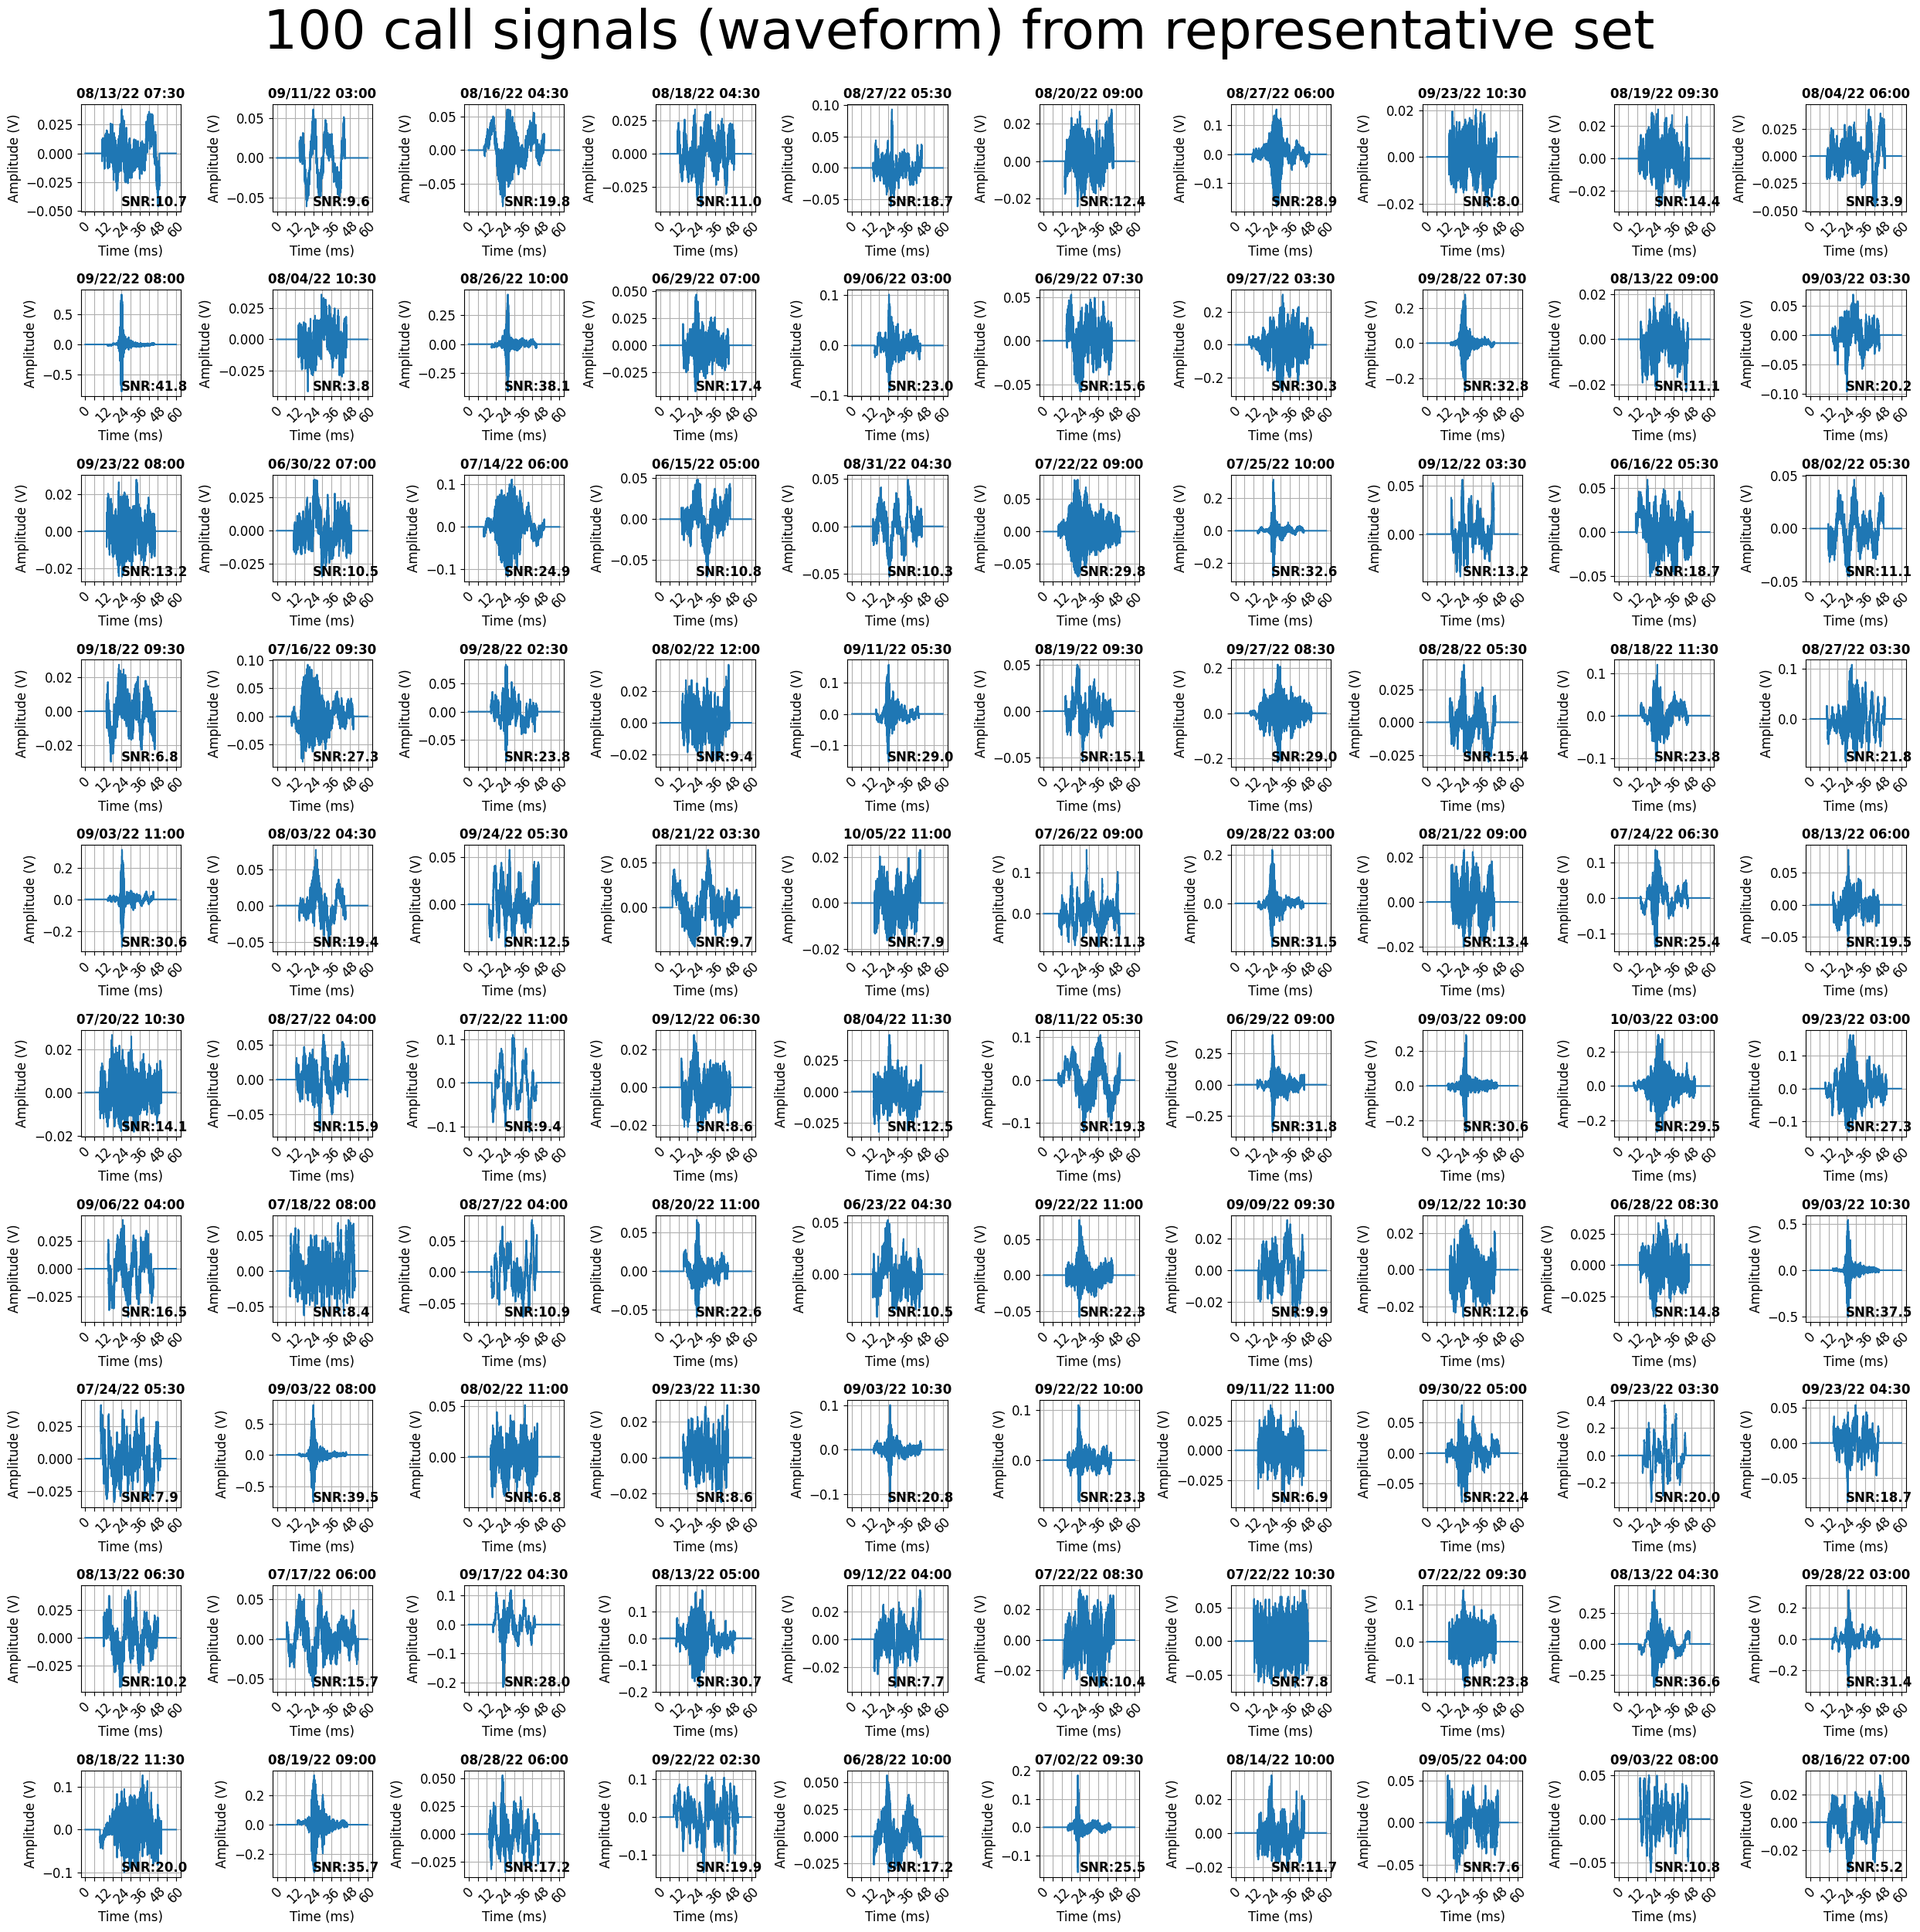

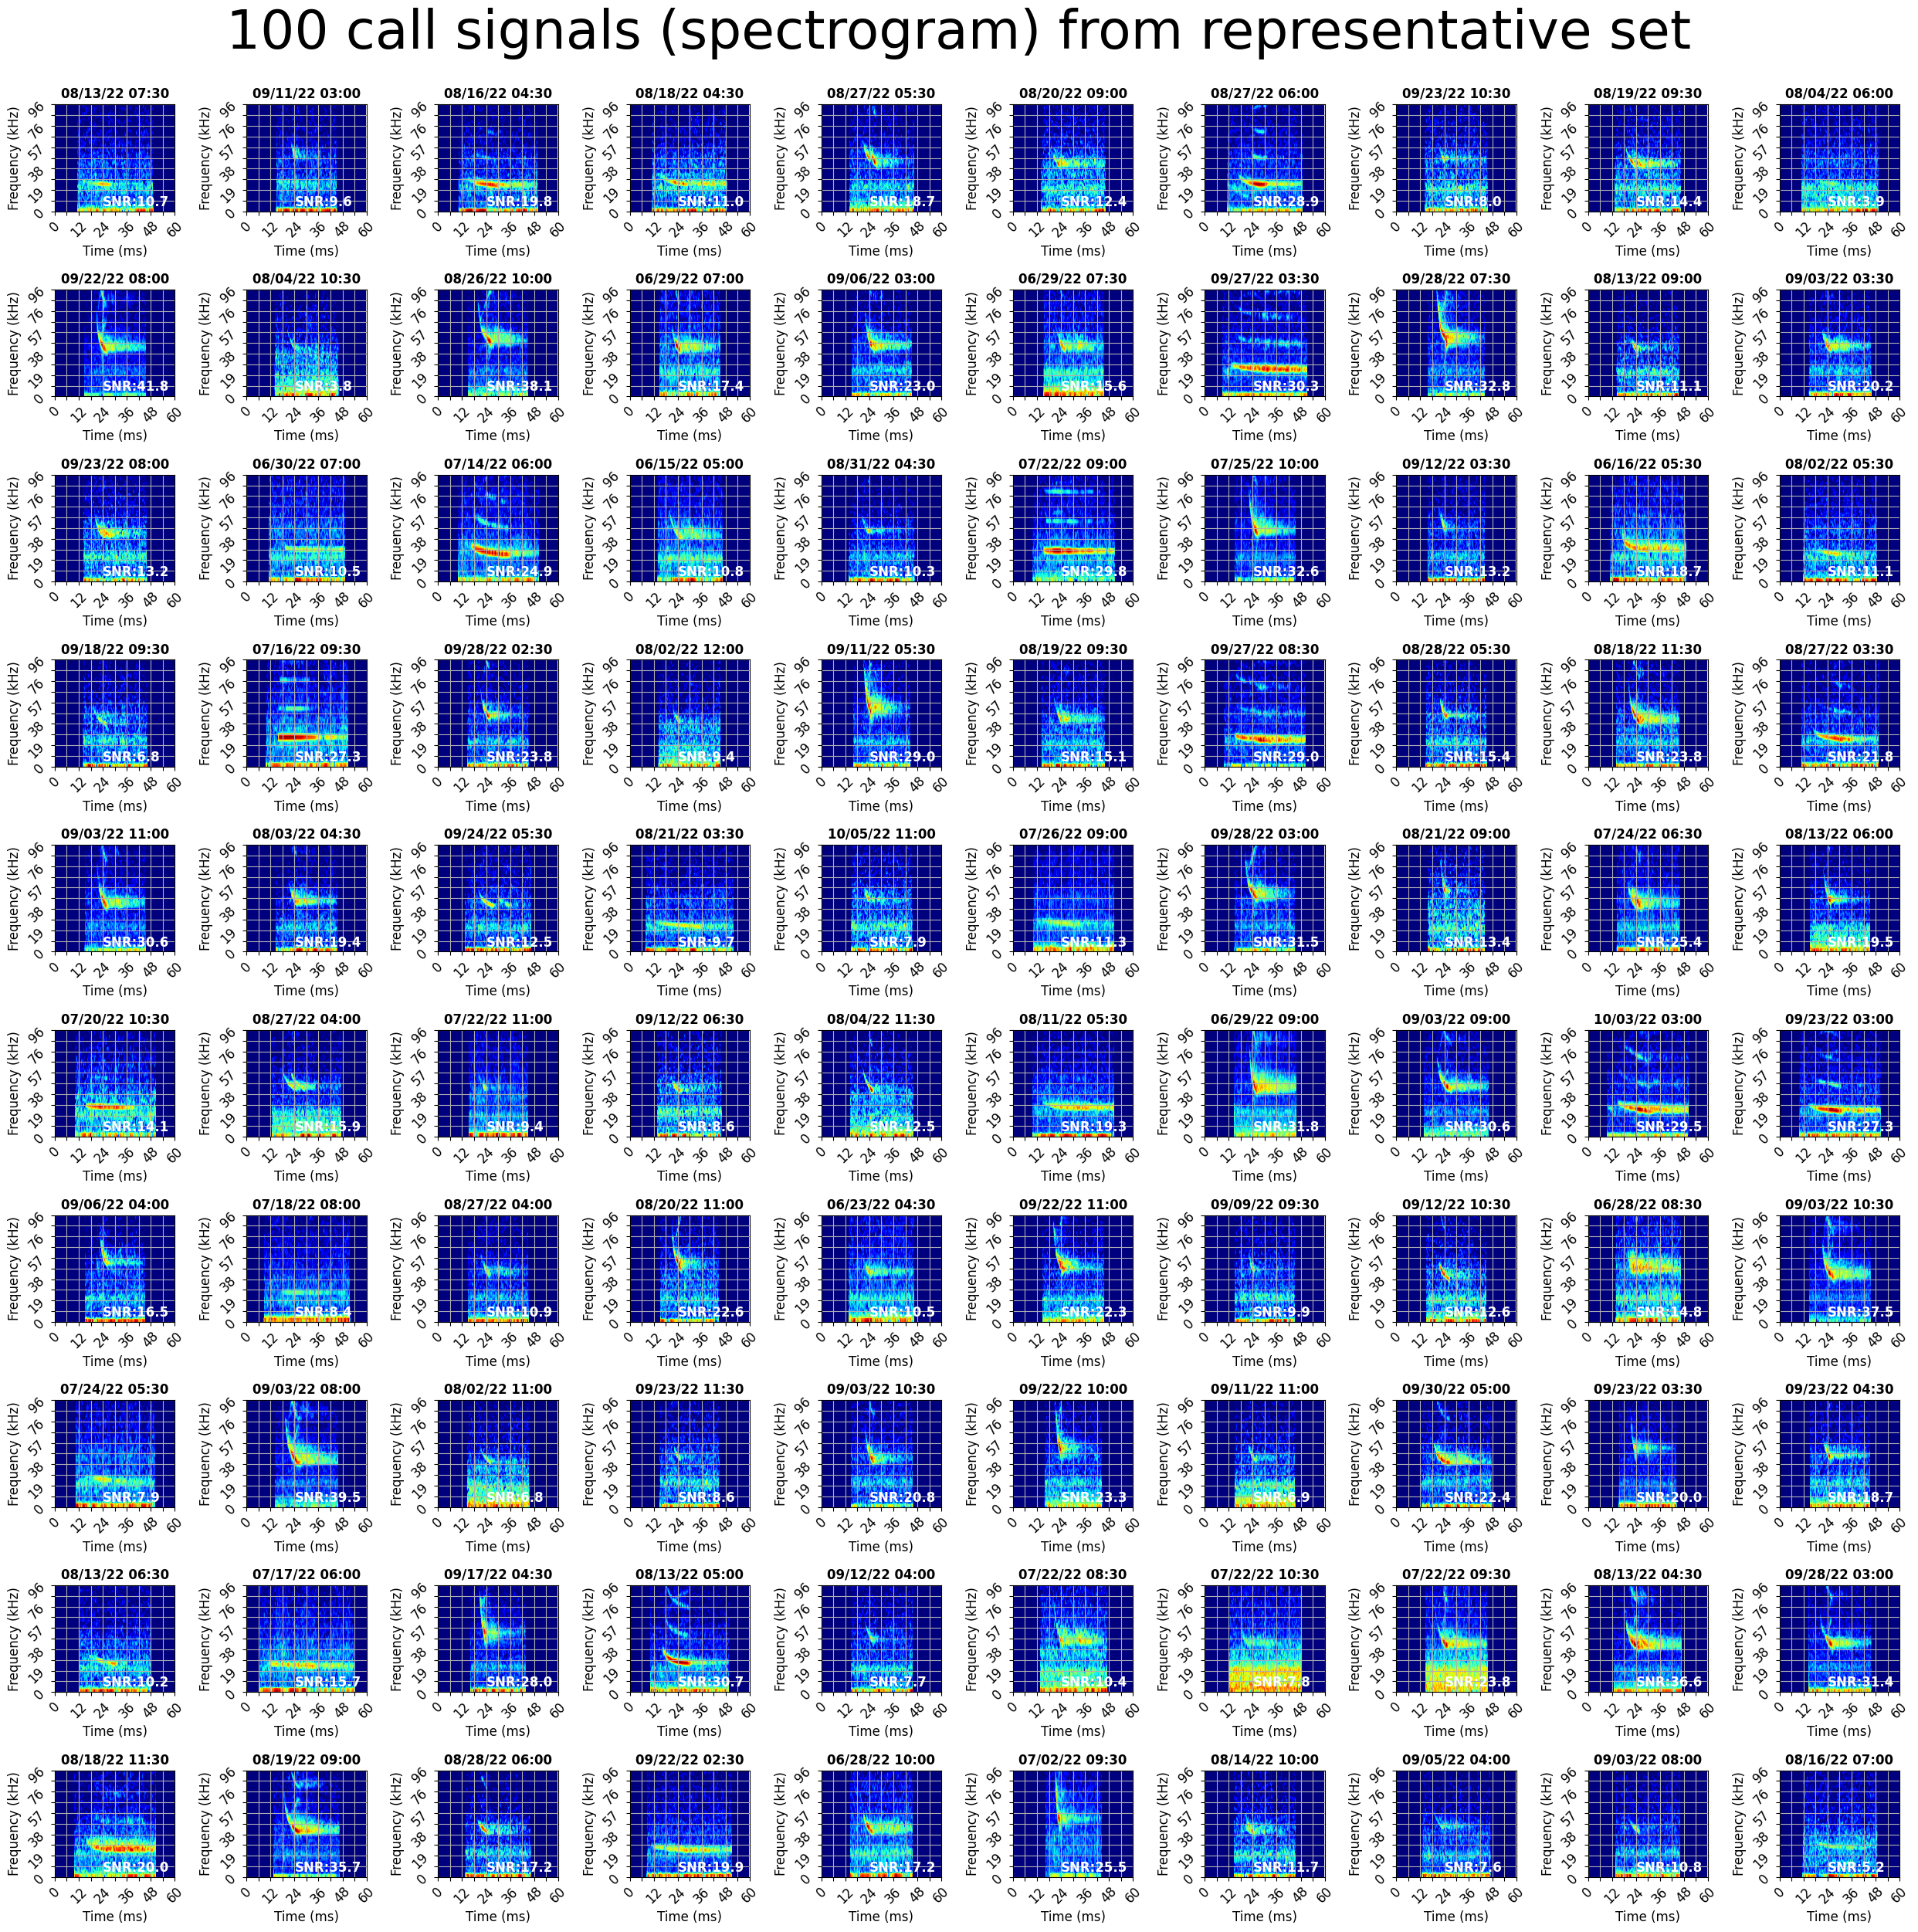

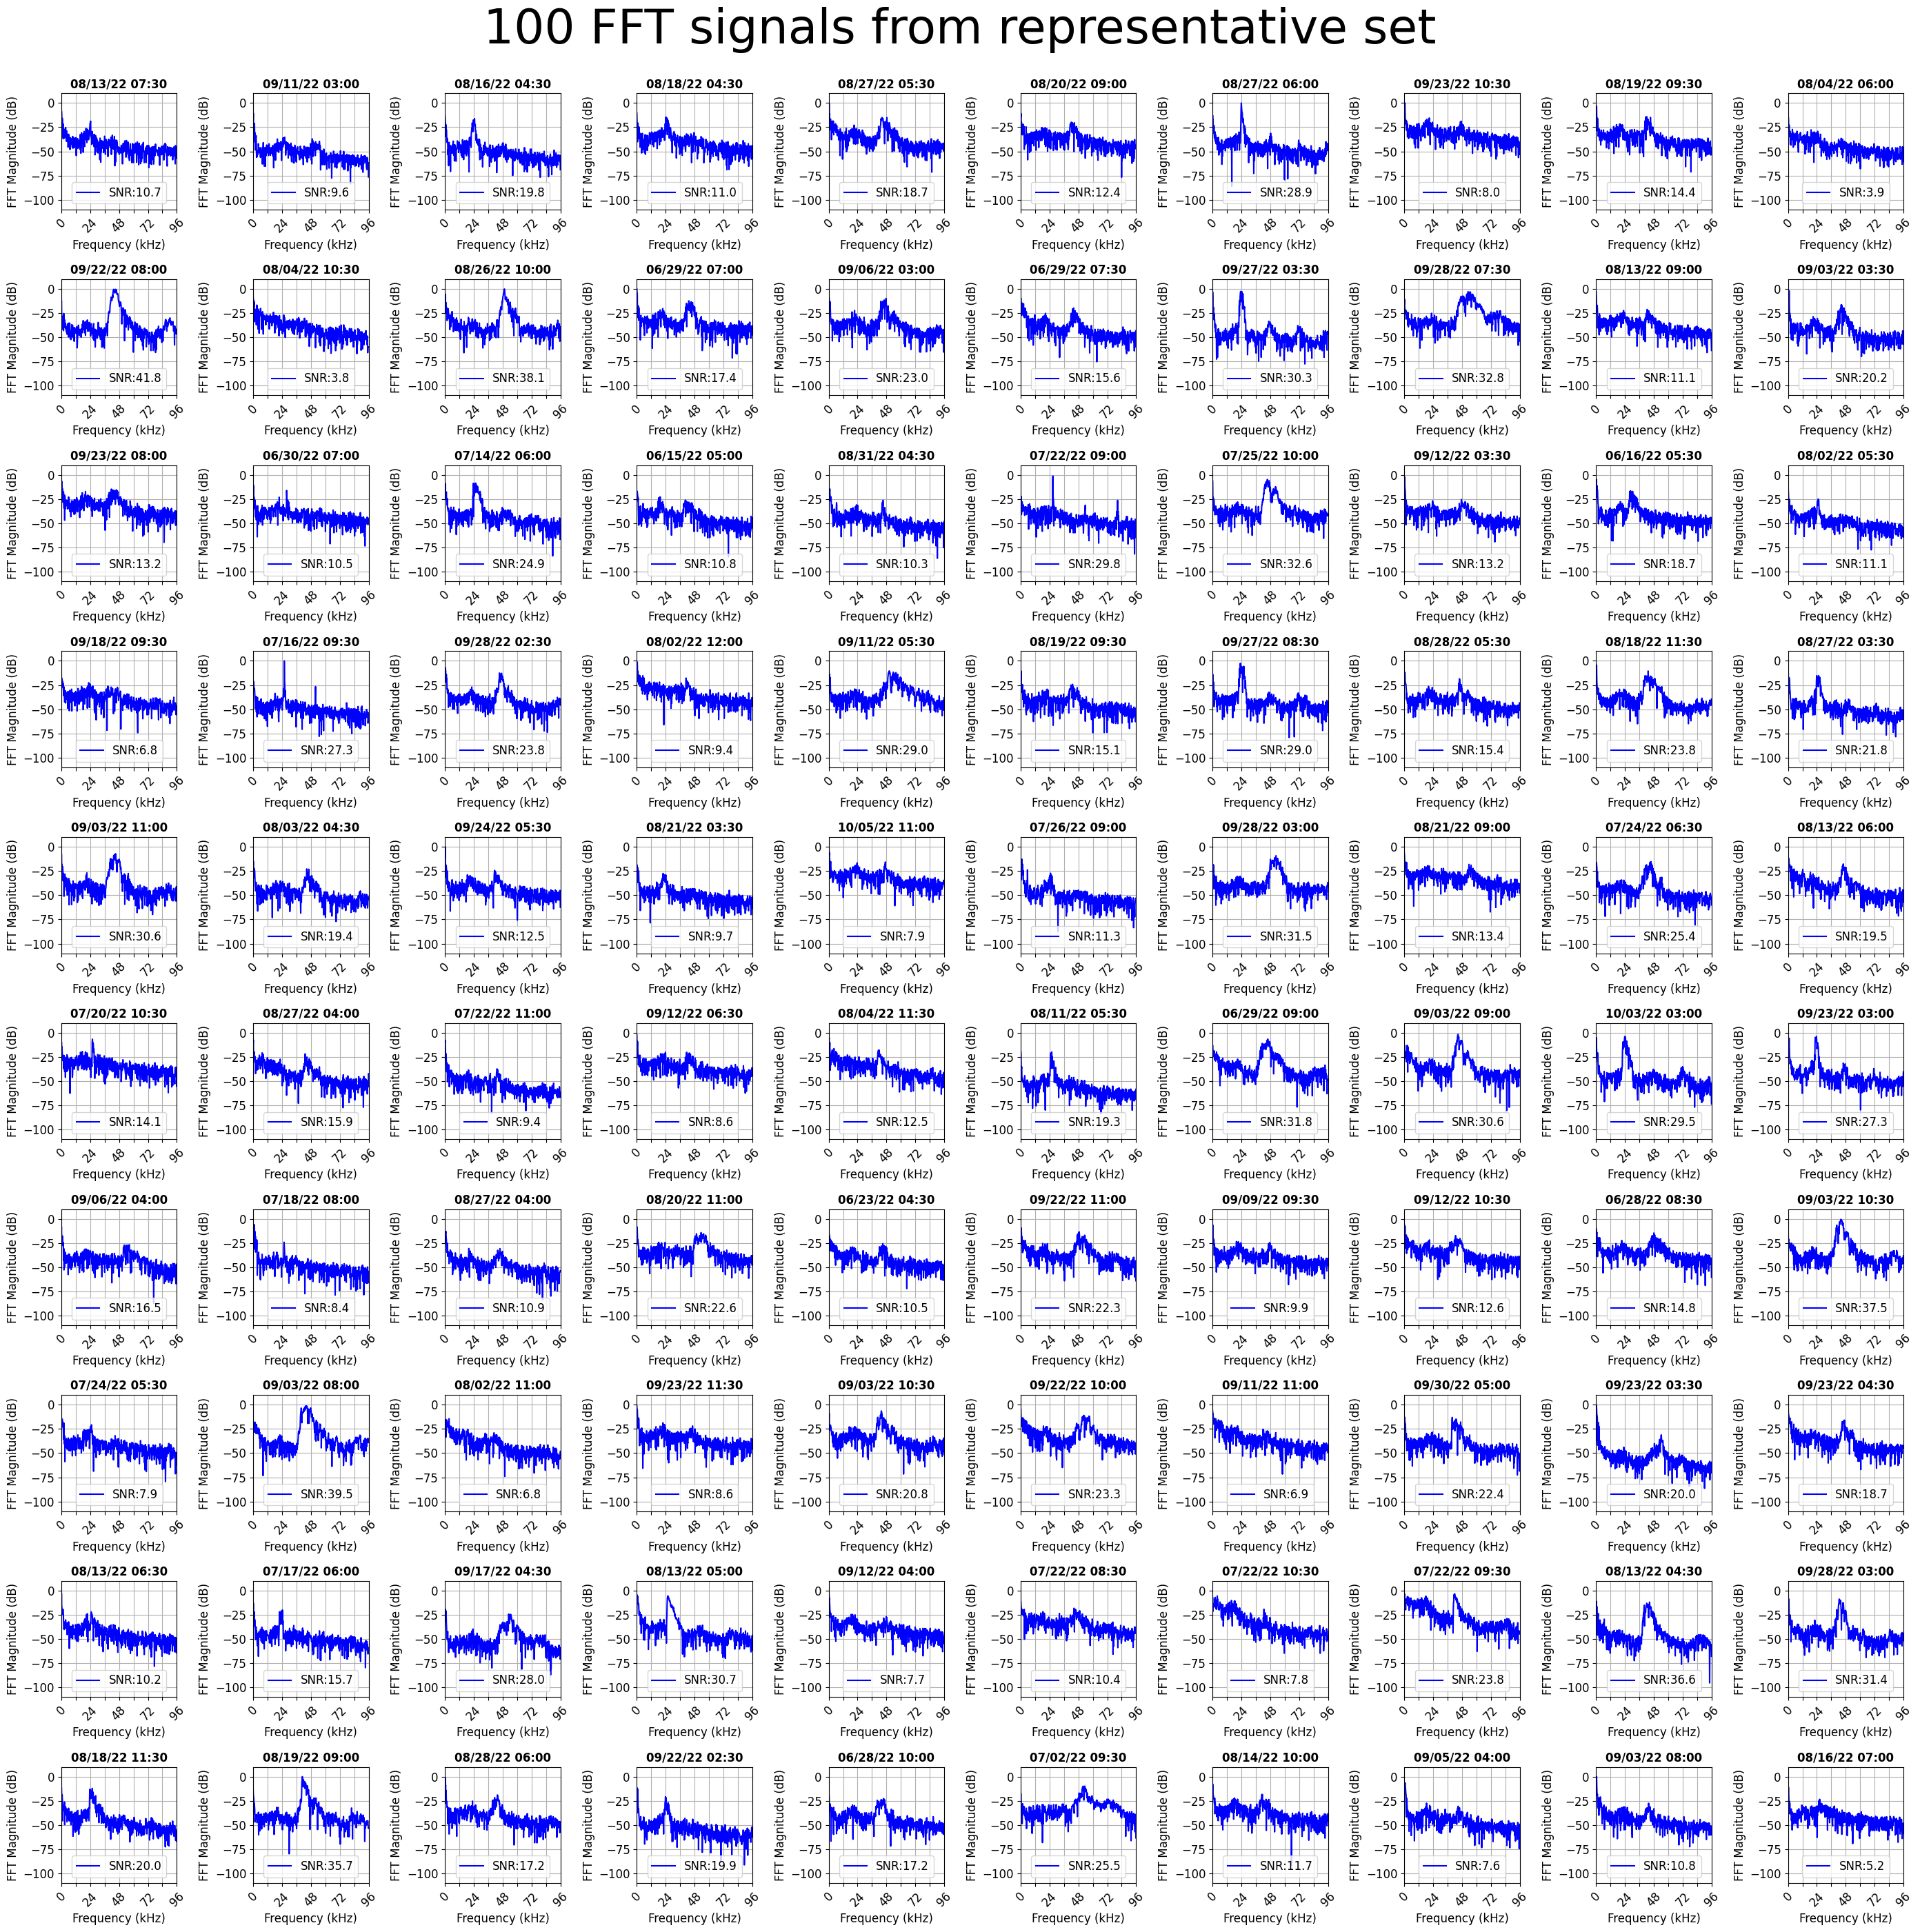

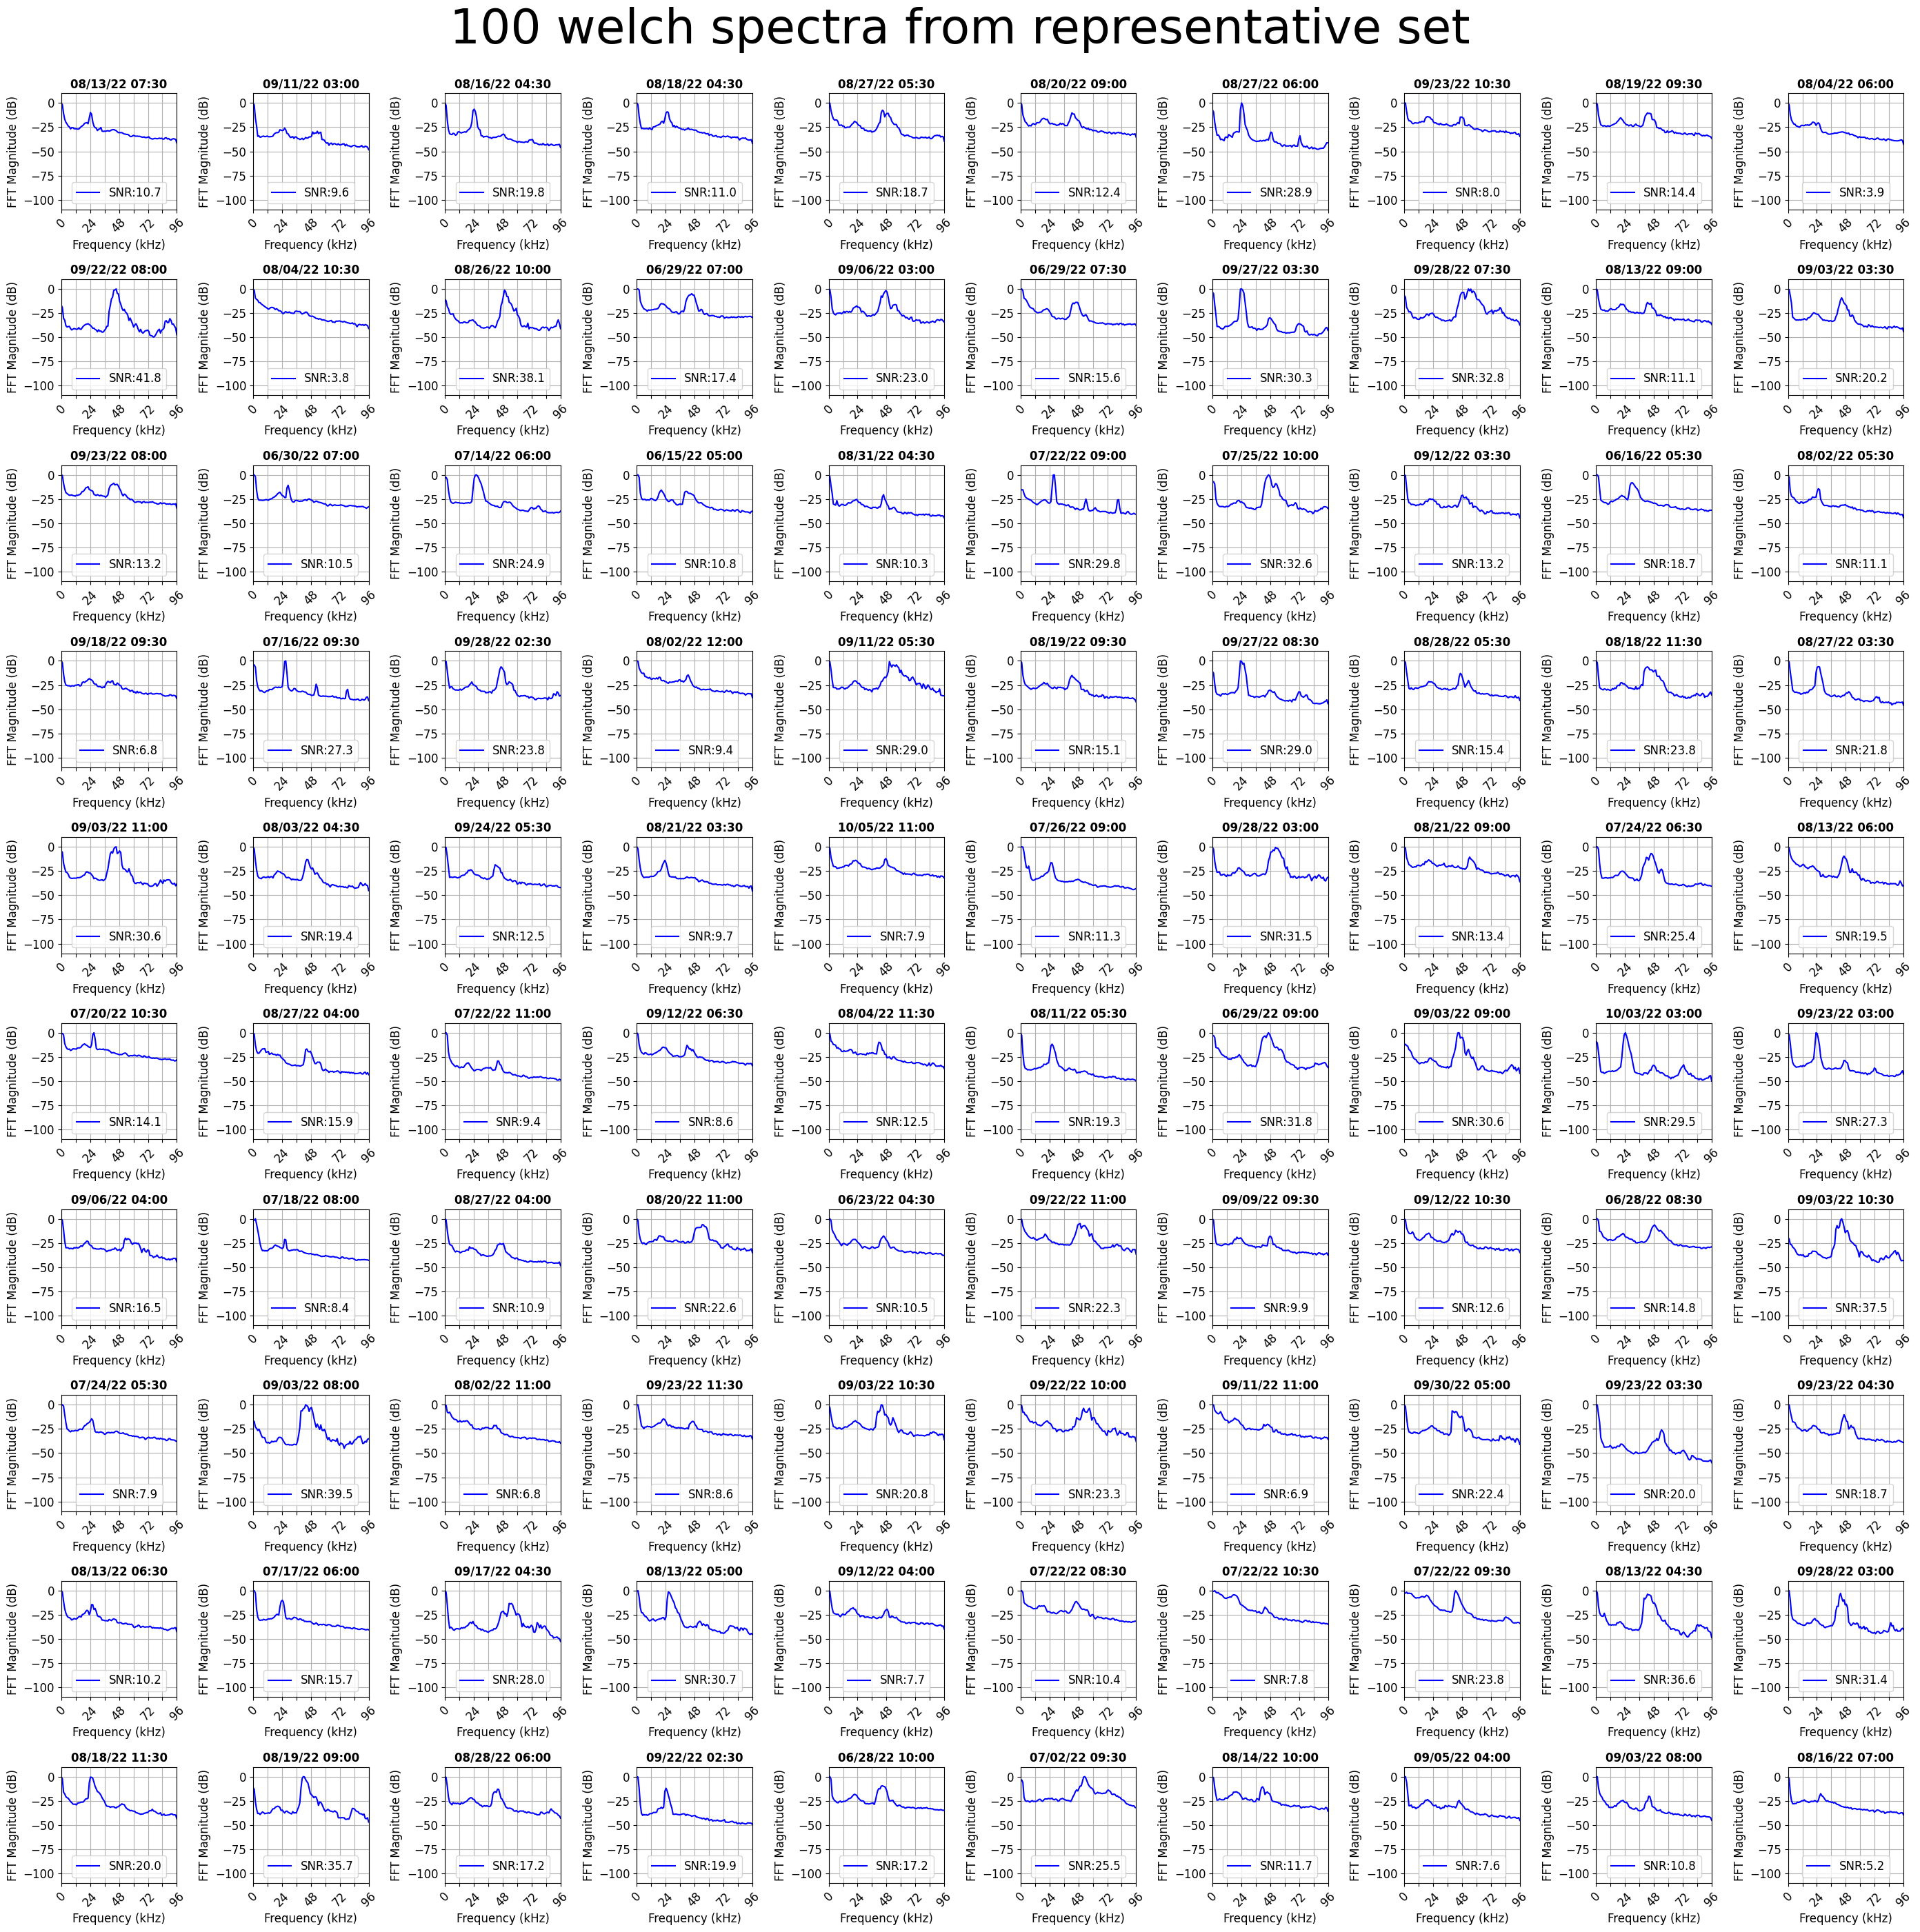

In [9]:
set_name = 'representative set'
plot_call_features.plot_n_calls(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
# plot_call_features.plot_n_energies(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
# plot_call_features.plot_n_cumenergies(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_specs(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_ffts(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_call_features.plot_n_welch(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)